<a href="https://colab.research.google.com/github/renearide/Analise_Dados_Amazon/blob/main/Analise_de_Dados_AMAZON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from shapely.geometry import LineString
from sklearn.tree import export_graphviz
from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sbn
sbn.set() # setting seaborn default for plots

In [ ]:
acao = yf.Ticker('AMZN')

###Criação DataFrame
---

In [ ]:
amzn = yf.download('AMZN','2017-01-01','2021-12-31')
amzn.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000


In [ ]:
amzn = amzn.reset_index()

In [ ]:
amzn['Date'] = amzn['Date'].dt.strftime('%Y-%m-%d') #modifica o formato da Data para ano-mês-dia

In [ ]:
amzn.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000
...,...,...,...,...,...,...
2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000


###Análise Exploratória das Variaveis

---

In [ ]:
amzn.shape

(1258, 7)

In [ ]:
amzn.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2017-01-03   37.896000   37.938000   37.384998   37.683498   37.683498   
1     2017-01-04   37.919498   37.984001   37.709999   37.859001   37.859001   
2     2017-01-05   38.077499   39.119999   38.013000   39.022499   39.022499   
3     2017-01-06   39.118000   39.972000   38.924000   39.799500   39.799500   
4     2017-01-09   39.900002   40.088501   39.588501   39.846001   39.846001   
...          ...         ...         ...         ...         ...         ...   
1253  2021-12-23  170.427994  171.975006  170.149994  171.068497  171.068497   
1254  2021-12-27  171.037003  172.942993  169.215500  169.669495  169.669495   
1255  2021-12-28  170.182495  172.175995  169.135498  170.660995  170.660995   
1256  2021-12-29  170.839996  171.212006  168.600494  169.201004  169.201004   
1257  2021-12-30  169.699997  170.888000  168.524002  168.644501  168.644501   

       

In [ ]:
amzn.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
amzn.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
amzn.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,104.312461,105.393682,103.106712,104.274060,104.274060,8.544071e+07
std,43.947440,44.465325,43.385747,43.893213,43.893213,4.107485e+07
min,37.896000,37.938000,37.384998,37.683498,37.683498,1.762600e+07
25%,74.940998,76.362997,73.972000,75.012873,75.012873,5.784750e+07
50%,91.448750,92.278000,90.615250,91.480999,91.480999,7.363200e+07
75%,156.325005,158.306503,154.310379,155.843498,155.843498,1.014720e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.313000e+08


### Análise Descritiva das Variáveis

---

Novo Dataframe, extraindo apenas o primeiro dia útil de cada mês. Isso foi feito para realizar uma segunda análise de correlação. 

In [ ]:
#amznBMS = amzn.reset_index() #reseta o índice Data

In [ ]:
amznBMS=amzn.copy(deep=True)

In [ ]:
amznBMS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
1,2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2,2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
3,2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
4,2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000


In [ ]:
#amznBMS['Date'] = pd.to_datetime(amzn.Date, format='%Y-%m-%d')#modifica o formato da Data para ano-mês-dia

In [ ]:
#amznBMS['Date'] = amzn['Date'].dt.strftime('%Y-%m-%d') #modifica o formato da Data para ano-mês-dia

In [ ]:
amznBMS.columns #mostra as colunas do DataFrame

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
pd.date_range('2017-01-01','2021-12-31', freq='BMS') #retorna o primeiro dia útil de cada mês

DatetimeIndex(['2017-01-02', '2017-02-01', '2017-03-01', '2017-04-03',
               '2017-05-01', '2017-06-01', '2017-07-03', '2017-08-01',
               '2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-02',
               '2018-05-01', '2018-06-01', '2018-07-02', '2018-08-01',
               '2018-09-03', '2018-10-01', '2018-11-01', '2018-12-03',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-03', '2019-07-01', '2019-08-01',
               '2019-09-02', '2019-10-01', '2019-11-01', '2019-12-02',
               '2020-01-01', '2020-02-03', '2020-03-02', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-03',
               '2020-09-01', '2020-10-01', '2020-11-02', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-03', '2021-06-01', '2021-07-01', '2021-08-02',
      

In [ ]:
amznBMS['Primeiro_Pregao_Mes'] = amznBMS['Date'].isin(['2017-01-02', '2017-02-01', '2017-03-01', '2017-04-03', 
'2017-05-01', '2017-06-01', '2017-07-03', '2017-08-01','2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01', 
'2018-01-01', '2018-02-01', '2018-03-01', '2018-04-02', '2018-05-01', '2018-06-01', '2018-07-02', '2018-08-01',
'2018-09-03', '2018-10-01', '2018-11-01', '2018-12-03', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', 
'2019-05-01', '2019-06-03', '2019-07-01', '2019-08-01','2019-09-02', '2019-10-01', '2019-11-01', '2019-12-02', 
'2020-01-01', '2020-02-03', '2020-03-02', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-03',
'2020-09-01', '2020-10-01', '2020-11-02', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
 '2021-05-03', '2021-06-01', '2021-07-01', '2021-08-02','2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01']) 
#criação de uma nova coluna que retorna true se a data é o primeiro dia últil do mês
amznBMS.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Primeiro_Pregao_Mes
0,2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000,False
1,2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000,False
2,2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000,False
3,2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000,False
4,2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000,False


In [ ]:
amznBMS.loc[amznBMS['Primeiro_Pregao_Mes']==True] #filtra os dados, retornando apenas o primeiro dia últil de cada mês

,Date,Open,High,Low,Close,Adj Close,Volume,Primeiro_Pregao_Mes
20,2017-02-01,41.460499,41.688999,41.247002,41.617500,41.617500,77004000,True
39,2017-03-01,42.652500,42.741501,42.450500,42.653999,42.653999,55202000,True
62,2017-04-03,44.400002,44.674500,44.271000,44.575500,44.575500,68446000,True
81,2017-05-01,46.389999,47.720001,46.389999,47.411499,47.411499,109330000,True
103,2017-06-01,49.929501,49.949501,49.568501,49.797501,49.797501,49096000,True
125,2017-07-03,48.639500,48.724499,47.549999,47.682999,47.682999,58182000,True
145,2017-08-01,49.805500,50.320000,49.578999,49.809502,49.809502,91452000,True
168,2017-09-01,49.209999,49.224998,48.844002,48.912498,48.912498,50718000,True
188,2017-10-02,48.200001,48.365501,47.605999,47.959499,47.959499,48858000,True
210,2017-11-01,55.270000,55.448502,54.837002,55.183998,55.183998,75110000,True


In [ ]:
del amznBMS['Primeiro_Pregao_Mes']

### Análise Categórica Simples

---


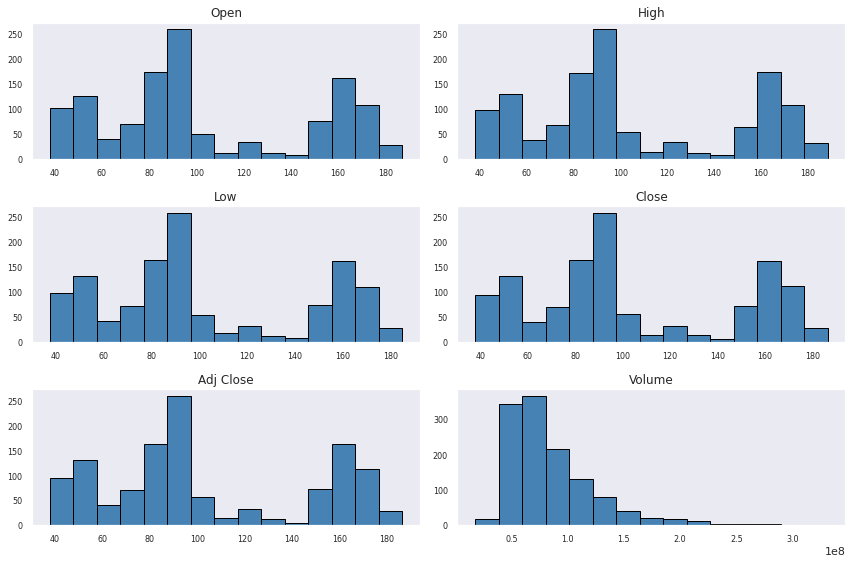

In [ ]:
amzn.hist(bins = 15, color = 'steelblue', edgecolor='black', linewidth=1.0, xlabelsize= 8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0,0,2,2))

**Mapa de calor de correlação**

Primeira análise, feita com o DataFrame amzn:

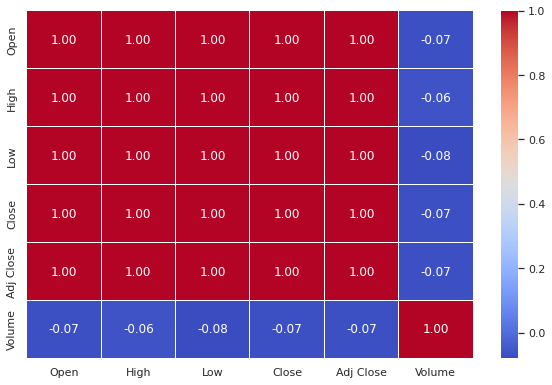

In [ ]:
f, ax = plt.subplots(figsize=(10,6))
correlacao = amzn.corr(method='pearson')
hm = sbn.heatmap(round(correlacao,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.1)
f.subplots_adjust(top=0.93)

Segunda análise, feita com o DataFrame amznDateIndex (analisando apenas o primeiro dia útil de cada mês):

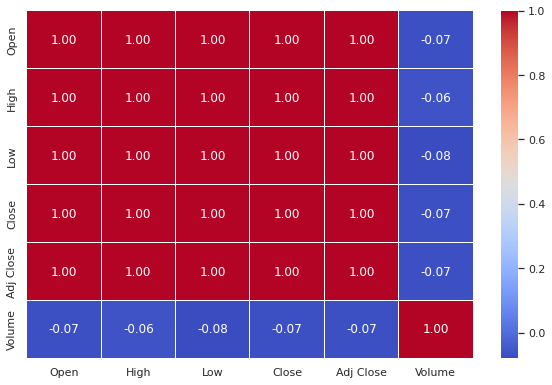

In [ ]:
f, ax = plt.subplots(figsize=(10,6))
correlacao = amznBMS.corr(method='pearson')
hm = sbn.heatmap(round(correlacao,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.1)
f.subplots_adjust(top=0.93)

**Formação dos Quartis**

In [ ]:
Q1 = amzn.quantile(0.25)
Q3 = amzn.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Open         8.138401e+01
High         8.194351e+01
Low          8.033838e+01
Close        8.083063e+01
Adj Close    8.083063e+01
Volume       4.362450e+07
dtype: float64


**Identificação de outliers**

In [ ]:
df_outliers = amzn[((amzn <(Q1-1.5*IQR))| (amzn>(Q3 + 1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [ ]:
(df_outliers<(Q1-1.5*IQR))|(df_outliers>(Q3+1.5*IQR))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,Adj Close,Close,Date,High,Low,Open,Volume
22,False,False,False,False,False,False,True
110,False,False,False,False,False,False,True
114,False,False,False,False,False,False,True
142,False,False,False,False,False,False,True
207,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
925,False,False,False,False,False,False,True
934,False,False,False,False,False,False,True
950,False,False,False,False,False,False,True
964,False,False,False,False,False,False,True


In [ ]:
amznVolume = amzn.drop(['Open','High','Low','Close','Adj Close'], axis = 1)

In [ ]:
Q1 = amznVolume.quantile(0.25)
Q3 = amznVolume.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Volume    43624500.0
dtype: float64


In [ ]:
df_outliersVolume = amznVolume[((amznVolume <(Q1-1.5*IQR))| (amznVolume>(Q3 + 1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [ ]:
amznV = (df_outliersVolume<(Q1-1.5*IQR))|(df_outliersVolume>(Q3+1.5*IQR))
amznV.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,Date,Volume
22,False,True
110,False,True
114,False,True
142,False,True
207,False,True


**Normalização dos dados**

In [ ]:
amznVolumeNorm = amzn.drop(['Open','High','Low','Close','Adj Close'], axis = 1)

In [ ]:
for column in amznVolumeNorm.columns: 
    amznVolumeNorm['Volume'] = amznVolumeNorm['Volume']  / amznVolumeNorm['Volume'].abs().max() 
      
display(amznVolume)

,Date,Volume
0,2017-01-03,70422000
1,2017-01-04,50210000
2,2017-01-05,116602000
3,2017-01-06,119724000
4,2017-01-09,68922000
...,...,...
1253,2021-12-23,36788000
1254,2021-12-27,58688000
1255,2021-12-28,54638000
1256,2021-12-29,35754000


In [ ]:
Q1 = amznVolumeNorm.quantile(0.25)
Q3 = amznVolumeNorm.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Volume    0.131677
dtype: float64


In [ ]:
df_outliersVolumeNorm = amznVolumeNorm[((amznVolumeNorm <(Q1-1.5*IQR))| (amznVolumeNorm>(Q3 + 1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [ ]:
amznVN = (df_outliersVolumeNorm<(Q1-1.5*IQR))|(df_outliersVolumeNorm>(Q3+1.5*IQR))
amznVN.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,Date,Volume
22,False,True
110,False,True
114,False,True
142,False,True
207,False,True


### Análise de dados faltantes, linhas em branco e outliers

---

In [ ]:
amzn.shape

(1258, 7)

In [ ]:
amzn.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

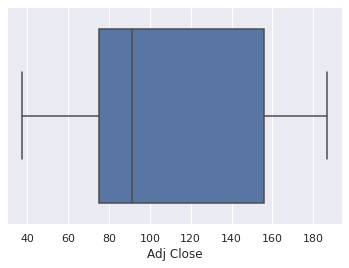

In [ ]:
sbn.boxplot(x=amzn['Adj Close'])

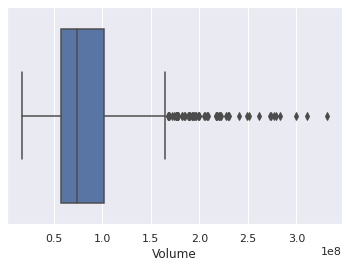

In [ ]:
sbn.boxplot(x=amzn['Volume'])

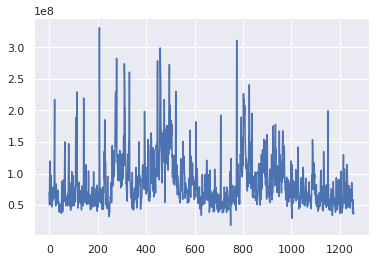

In [ ]:
plt.plot(amzn['Volume'])

### Naive Bayes

---

In [ ]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

In [ ]:
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
1,2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2,2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
3,2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
4,2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000


In [ ]:
amznNB = amzn.set_index('Date')

In [ ]:
amznNB.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000


In [ ]:
amznNB['EMA']=amznNB['Adj Close'].ewm(span=21).mean()

In [ ]:
amznNB['Diff']=amznNB['Adj Close'].diff()

In [ ]:
amznNB['SMA_2']=amznNB['Adj Close'].rolling(2).mean()

In [ ]:
amznNB['Force_Index'] = amznNB['Adj Close'] * amznNB['Volume']

In [ ]:
amznNB["y"] = amznNB["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)

In [ ]:
amznNB.head()

,EMA,SMA_2,Force_Index,y
Date,,,,
2017-01-04,37.775428,37.771250,1.900900e+09,1.0
2017-01-05,38.231306,38.440750,4.550101e+09,1.0
2017-01-06,38.681051,39.410999,4.764955e+09,1.0
2017-01-09,38.960424,39.822750,2.746266e+09,0.0
2017-01-10,39.134628,39.820499,2.036230e+09,1.0


In [ ]:
amznNB = amznNB.drop(
   ["Open", "High", "Low", "Close", "Volume", "Diff", "Adj Close"],
   axis=1,
).dropna()

In [ ]:
X = amznNB.drop(["y"], axis=1).values
y = amznNB["y"].values
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.2,
   shuffle=False,
)
clf = BernoulliNB()
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5158730158730159


In [ ]:
len(y_test), y_test.sum(), y_test.sum()/len(y_test)

(252, 130.0, 0.5158730158730159)

RGF https://10mohi6.medium.com/super-easy-python-stock-price-forecasting-using-bernoulli-naive-bayes-machine-learning-23c5aaf4387

https://blog.quantinsti.com/naive-bayes/